<a href="https://colab.research.google.com/github/Miqquelangel/Portfolio-Miguel-Angel/blob/main/Modelo_predictivo_de_im%C3%A1genes_del_sector_de_la_moda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OVERVIEW
Este proyecto está realizado completamente por mí, es una adaptación de otro realizado en el curso **TensorFlow Developer Certificate in 2021: Zero to Mastery.**



Vamos a proceder a visualizar el porcentaje de acierto de un modelo sobre las predicciones a la hora de clasificar distintas imágenes procedentes de una base de datos de moda.


**-Funciones a realizar:**

* Visualizar los datos con los cuales vamos a trabajar y prepararlos para ser introducidos en nuestro modelo **(normalización)**.
* Creación de un modelo de clasificación con los algoritmos más adaptados a nuestras necesidades. En este modelo concreto, trabajaremos con:
 * **Funciones de Activación 'ReLu' y 'Softmax'**
 * **Loss function = Spare_Categorical_Crossentropy**
   * Como veremos mas adelante, nuestros **Labels** serán integers. Podríamos utilizar el método de One Hot Encode y aplicar la función **Categorical Crossentropy**, pero en este modelo concreto trabajaremos con **Sparse Categorical Crossentropy**
 
 * **optimizador ADAM.**

 * **Metrics = Accuracy**

* Visualizacion de la arquitectura de nuestro modelo y representación de forma gráfica de los parámetros obtenidos del mismo.

* Representación gráfica de las predicciones de nuestro modelo y análisis.


#PREPARACIÓN DEL ENTORNO DE TRABAJO


In [ ]:
#Vamos a empezar importando las librerias que vayamos a necesitar. A medida que vayamos necesitando más importaremos las correspondientes.

from tensorflow.keras.datasets import fashion_mnist # Esta es la Base de datos (MNIST) con la cual vamos a entrenar el modelo. Ya viene dividida en Test y Training sets.

import tensorflow as tf
import random
import itertools
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import plot_model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#RECOLECCIÓN DE DATOS Y PREPROCESAMIENTO


**Descarga de nuestros datos y establecer sets de entrenamiento y testeo.**

**Ver con cuantas muestras de información contamos.**

In [ ]:
# Vamos a proceder a cargar la base de datos y establecer los sets de entrenamiento y testeo:
(xt, yt),(xtest, ytest) = fashion_mnist.load_data()

In [ ]:
xt.shape, xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
yt.shape, ytest.shape

((60000,), (10000,))

**Sabemos que contamos con 60000 muestras en nuestros set de entrenamiento y 10000 en los de testeo.**

**Tambien sabemos que 'x', al ser imágenes, el valor (28,28) de (60000, 28, 28) corresponde a las dimensiones de la imágen.
En cuanto a 'y', solo contamos con numeros integrales.**

## Visualización

**Sabemos que nuestras variables 'x' son imágenes y la variable 'y' son numeros integrales, asi que vamos a proceder a representarlos como corresponde:**

In [ ]:
# Representación de las 10 primeras muestras de 'y' en nuestro set de testeo:
pd.DataFrame(ytest[:10], columns=["Labels"])

,Labels
0,9
1,2
2,1
3,1
4,6
5,1
6,4
7,6
8,5
9,7


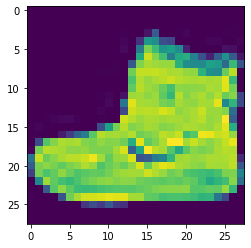

In [ ]:
# Representación de una muestra aleatoria de 'x' en nuestro set de entrenamiento:
plt.imshow(xt[0]);

**Sabemos gracias a la página de [GitHub](https://github.com/zalandoresearch/fashion-mnist#labels), de donde obtenemos nuestra base de datos, a que valor corresponde cada clase.**

**De esta manera, podremos crear un índice para poder diferenciar nuestras clases.**

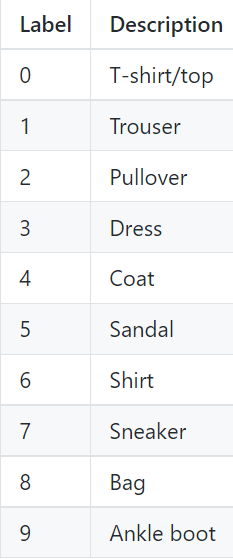

In [ ]:
# Creamos el índice de las clases:
clases= ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Ahora procederemos a crear una *función* para visualizar las muestras que deseemos de 'x' respecto de 'y':**

In [ ]:
# Función
def Representar(i):
  plt.figure(figsize=(10,10))
  for a in range(i):
    ax=plt.subplot((i/2),(i/2),a+1)
    randomindex=random.choice(range(len(xt)))
    plt.imshow(xt[randomindex], cmap=plt.cm.binary)
    plt.title(clases[yt[randomindex]])

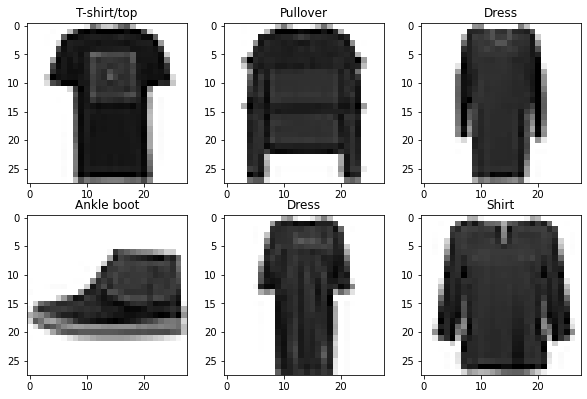

In [ ]:
# Vamos a representar 6 muestras:
Representar(6)

**Podemos apreciar antes de meternos en la creación del modelo que las imágenes están compuestas por lineas rectas y curvas.**

**Esto es muy importante ya que tendremos que incorporar funciones no lineales como ya veremos en la creación del modelo.**

##Preprocesamiento (normalización)

**Tenemos que aplicar la normalización a nuestros sets 'x' de entrenamiento y testeo para que el modelo sea mucho más eficiente.**

**Para ello, obtendremos el valor máximo dentro de nuestros sets y divideremos todos nuestros elementos en los sets por ese valor máximo:**

In [ ]:
xt.max()

255

In [ ]:
xtest.max()

255

In [ ]:
# Procedemos a normalizar:
xt_normalizado = xt / 255.0
xtest_normalizado = xtest / 255.0

**Si la normalizacion se ha realizado correctamente, los valores mínimos y máximos de nuestros sets seran iguales a '0' y '1' respectivamente:**

In [ ]:
xt_normalizado.min(), xt_normalizado.max()

(0.0, 1.0)

In [ ]:
xtest_normalizado.min(), xtest_normalizado.max()

(0.0, 1.0)

#CREACIÓN DEL MODELO PRIMIGENIO

**Modelo con 'Callbacks' para poder realizar los siguientes modelos.**

**De esta manera podremos representar gráficos con los valores de 'loss' y 'accuracy' al igual que el 'learning rate' y 'epochs' para que en los proximos modelos los resultados sean más precisos.**


In [ ]:
tf.keras.set_seed=42 # Set_seed es importante ya que necesitamos la máxima reproducibilidad.

# Creación del modelo utilizando API secuencial.
Modelo_callback = tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape = (28, 28)), # Necesitamos aclarar las dimensiones de nuestras imágenes para que el modelo funcione correctamente                                                                  
 tf.keras.layers.Dense(100, activation = "relu"),
 tf.keras.layers.Dense(100, activation = "relu"),
 tf.keras.layers.Dense(100, activation = "relu"),                       
 tf.keras.layers.Dense(10, activation = "softmax") # Output layer con valor '10' ya que tenemos que predecir 10 clases distintas.
])
# Las funciones de activación escogidas se deben a sus propiedades 'non-linear'.
# 'Softmax' se utiliza a menudo como activación para el último layer porque el resultado podría interpretarse como una distribución de probabilidad.

# Compilamos el modelo.
Modelo_callback.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
           optimizer = tf.keras.optimizers.Adam(),
           metrics = ["accuracy"])

# Establecemos un set de valores del learning rate empezando desde 1e-4, incrementando 10**(epoch/20) cada epoch.
lr_ratio = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

# Encajamos el modelo.
history_callback = Modelo_callback.fit(xt_normalizado, yt, epochs = 50, verbose = 2, callbacks = [lr_ratio])
# Establecemos el valor '2' a "verbose" para obtener datos de los epochs y accuracy para así poder establecer un Learning rate más óptimo.

# Evaluamos el modelo.
Modelo_callback.evaluate(xtest_normalizado, ytest)

Epoch 1/50
1875/1875 - 4s - loss: 0.6774 - accuracy: 0.7739
Epoch 2/50
1875/1875 - 4s - loss: 0.4428 - accuracy: 0.8441
Epoch 3/50
1875/1875 - 4s - loss: 0.4001 - accuracy: 0.8573
Epoch 4/50
1875/1875 - 4s - loss: 0.3744 - accuracy: 0.8672
Epoch 5/50
1875/1875 - 4s - loss: 0.3563 - accuracy: 0.8732
Epoch 6/50
1875/1875 - 4s - loss: 0.3406 - accuracy: 0.8762
Epoch 7/50
1875/1875 - 4s - loss: 0.3259 - accuracy: 0.8824
Epoch 8/50
1875/1875 - 4s - loss: 0.3150 - accuracy: 0.8857
Epoch 9/50
1875/1875 - 4s - loss: 0.3054 - accuracy: 0.8873
Epoch 10/50
1875/1875 - 4s - loss: 0.2956 - accuracy: 0.8921
Epoch 11/50
1875/1875 - 4s - loss: 0.2893 - accuracy: 0.8927
Epoch 12/50
1875/1875 - 4s - loss: 0.2832 - accuracy: 0.8950
Epoch 13/50
1875/1875 - 4s - loss: 0.2780 - accuracy: 0.8967
Epoch 14/50
1875/1875 - 4s - loss: 0.2714 - accuracy: 0.8992
Epoch 15/50
1875/1875 - 4s - loss: 0.2693 - accuracy: 0.9006
Epoch 16/50
1875/1875 - 4s - loss: 0.2667 - accuracy: 0.9015
Epoch 17/50
1875/1875 - 4s - loss

[1.4675133228302002, 0.3677000105381012]

**Según el glosario los valores mas altos de 'accuracy' los obtenemos entre los epochs 15 y 24.**

##Arquitectura de nuestro modelo callback

In [ ]:
Modelo_callback.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1010      
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


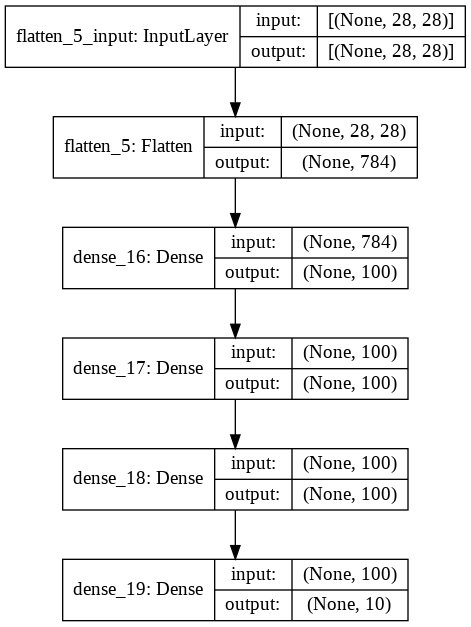

In [ ]:
plot_model(Modelo_callback,show_shapes=True)

**Como se puede observar, la funcion del layer 'Flatten' se basa en convertir los dimensiones (28, 28) a una sola siendo 784 = 28* 28**

##Representación gráfica de nuestro modelo callback para optimizar los siguientes modelos.

In [ ]:
# Vamos a definir 2 funciones para poder visualizar el learning rate, loss y accuracy:
def grafico_loss_accuracy_lr(history):
  pd.DataFrame(history.history).plot(figsize=(10,8),xlabel="epochs") 

def lr_loss(history):
  lr_valor = 1e-4 *10**(tf.range(50)/20)
  plt.figure(figsize=(20,7))
  plt.semilogx(lr_valor,history.history["loss"])
  plt.xlabel("learning rate")
  plt.ylabel("loss")

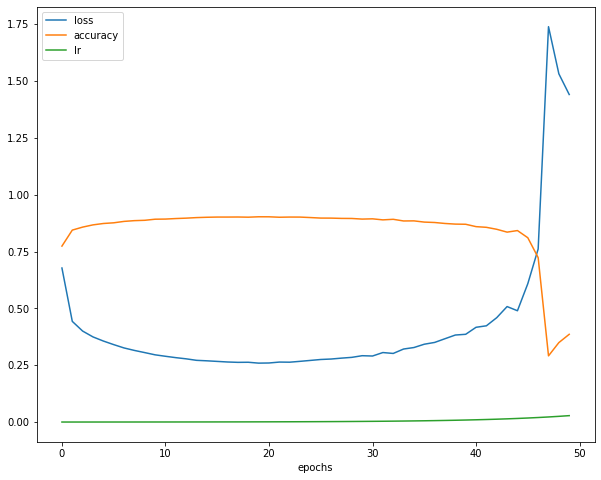

In [ ]:
grafico_loss_accuracy_lr(history_callback)

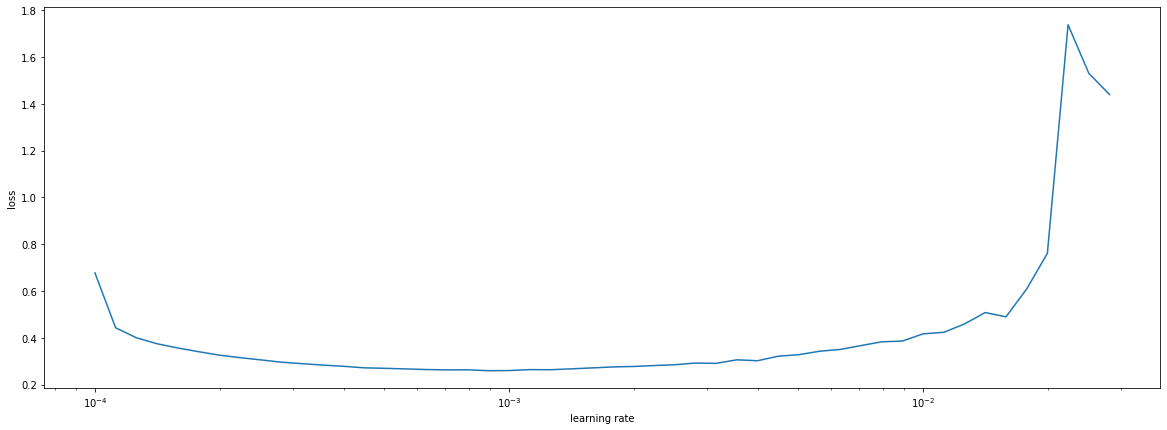

In [ ]:
lr_loss(history_callback)

**A partir de estos gráficos más la información del glosario de la evaluación del modelo, podemos empezar a intuir que nuestro modelo será óptimo entre los epochs '15' y '24' y podremos adaptar el learning rate especifico creando un tensor para que cada elemento en su interior corresponda al learning rate específico del epoch concreto con la fórmula:**

* *lr_valor[epoch a escoger] = 1e-4 * *10***(tf.range(50)/20)*




#MODELOS DE ENTRENAMIENTO

**Vamos a comenzar con nuestros modelos de entrenamiento utilizando la misma arquitectura que el modelo callback en los primeros 3 modelos pero probando distintos valores de Learning rate y epochs.**

**Finalmente realizaré experimentaciones aleatorias con un modelo variando los parámetros que considere necesarios, dejando plasmado el resultado de la mejor experimentación.**

**En cada modelo mostraré una tabla en la cual se refleja el nivel de 'accuracy'. Cuando el último modelo sea completado procederemos a comparar los resultados de 'accuracy'.**

**Finalmente, con el modelo que obtengamos mejores resultados procederemos a representarlo gráficamente de diversas maneras para estimar el rendimiento de sus predicciones.**

In [ ]:
# Definimos la fórmula para obtener el tensor con los valores de Learning rate:
lr_valor = 1e-4 *10**(tf.range(50)/20)

##Modelo_1

**Learning rate de 18 epochs:**

In [ ]:
lr_valor[18]

<tf.Tensor: shape=(), dtype=float64, numpy=0.0007943282347242815>

In [ ]:
tf.keras.set_seed=42 # Set_seed es importante ya que necesitamos la máxima reproducibilidad.

# Creación del modelo utilizando API secuencial.
Modelo_1 = tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape = (28, 28)),                                                                 
 tf.keras.layers.Dense(100, activation = "relu"),
 tf.keras.layers.Dense(100, activation = "relu"),
 tf.keras.layers.Dense(100, activation = "relu"),                       
 tf.keras.layers.Dense(10, activation = "softmax")
])

# Compilamos el modelo.
Modelo_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
           optimizer = tf.keras.optimizers.Adam(0.0007943282347242815),
           metrics = ["accuracy"])

# Encajamos el modelo.
history_1 = Modelo_1.fit(xt_normalizado, yt, epochs = 18, verbose = 0, validation_data = (xtest_normalizado, ytest))

# Evaluamos el modelo.
Modelo_1.evaluate(xtest_normalizado, ytest)

313/313 [==============================] - 0s 1ms/step - loss: 0.3658 - accuracy: 0.8891


[0.36582255363464355, 0.8891000151634216]

###Definimos una función para obtener una tabla que nos muestre el parámetro 'accuracy' de este modelo y el de los siguientes:

In [ ]:
def accuracy(modelo):
  accuracy=modelo.evaluate(xtest_normalizado, ytest, verbose = 0)
  a=tf.constant(accuracy)
  b=a[1].numpy()*100
  c=f"{(b):.2f}%"
  resultado_modelo = [["Modelo",c]]
  return pd.DataFrame(resultado_modelo, columns=["Modelo", "accuracy"])

**Definimos la función que nos permitirá obtener el valor numérico de 'accuracy' para más adelante poder crear una tabla comparativa entre modelos:**

In [ ]:
def accuracy_value(modelo):
  accuracy=modelo.evaluate(xtest_normalizado, ytest, verbose = 0)
  a=tf.constant(accuracy)
  b=a[1].numpy()*100
  c=f"{(b):.2f}%"
  return c

#####**Visualizamos el parámetro 'accuracy':**

In [ ]:
accuracy(Modelo_1)

,Modelo,accuracy
0,Modelo,88.91%


##Modelo_2

**Learning rate de 23 epochs:**

In [ ]:
lr_valor[23]

<tf.Tensor: shape=(), dtype=float64, numpy=0.0014125375446227542>

In [ ]:
tf.keras.set_seed=42 # Set_seed es importante ya que necesitamos la máxima reproducibilidad.

# Creación del modelo utilizando API secuencial.
Modelo_2 = tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape = (28, 28)),                                                                 
 tf.keras.layers.Dense(100, activation = "relu"),
 tf.keras.layers.Dense(100, activation = "relu"),
 tf.keras.layers.Dense(100, activation = "relu"),                       
 tf.keras.layers.Dense(10, activation = "softmax")
])

# Compilamos el modelo.
Modelo_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
           optimizer = tf.keras.optimizers.Adam(0.0014125375446227542),
           metrics = ["accuracy"])

# Encajamos el modelo.
history_2 = Modelo_2.fit(xt_normalizado, yt, epochs = 23, verbose = 0, validation_data = (xtest_normalizado, ytest))

# Evaluamos el modelo.
Modelo_2.evaluate(xtest_normalizado, ytest)

313/313 [==============================] - 0s 1ms/step - loss: 0.3737 - accuracy: 0.8873


[0.3737257421016693, 0.8873000144958496]

####**Visualizamos el parámetro 'accuracy':**

In [ ]:
accuracy(Modelo_2)

,Modelo,accuracy
0,Modelo,88.73%


##Modelo_3

**Learning rate de 20 epochs:**

In [ ]:
lr_valor[20]

<tf.Tensor: shape=(), dtype=float64, numpy=0.001>

In [ ]:
tf.keras.set_seed=42 # Set_seed es importante ya que necesitamos la máxima reproducibilidad.

# Creación del modelo utilizando API secuencial.
Modelo_3 = tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape = (28, 28)),                                                                 
 tf.keras.layers.Dense(100, activation = "relu"),
 tf.keras.layers.Dense(100, activation = "relu"),
 tf.keras.layers.Dense(100, activation = "relu"),                       
 tf.keras.layers.Dense(10, activation = "softmax")
])

# Compilamos el modelo.
Modelo_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
           optimizer = tf.keras.optimizers.Adam(0.001),
           metrics = ["accuracy"])

# Encajamos el modelo.
history_3 = Modelo_3.fit(xt_normalizado, yt, epochs = 20, verbose = 0, validation_data = (xtest_normalizado, ytest))

# Evaluamos el modelo.
Modelo_3.evaluate(xtest_normalizado, ytest)

313/313 [==============================] - 0s 1ms/step - loss: 0.3631 - accuracy: 0.8889


[0.3631018400192261, 0.8888999819755554]

###**Visualizamos el parámetro 'accuracy':**

In [ ]:
accuracy(Modelo_3)

,Modelo,accuracy
0,Modelo,88.89%


##Modelo_4 (Modelo experimental)

In [ ]:
tf.keras.set_seed=42 # Set_seed es importante ya que necesitamos la máxima reproducibilidad.

# Creación del modelo utilizando API secuencial.
Modelo_4 = tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape = (28, 28)),                                                                 
 tf.keras.layers.Dense(100, activation = "relu"),
 tf.keras.layers.Dense(100, activation = "relu"),
 tf.keras.layers.Dense(100, activation = "relu"),
 tf.keras.layers.Dense(100, activation = "relu"),                       
 tf.keras.layers.Dense(10, activation = "softmax")
])

# Compilamos el modelo.
Modelo_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
           optimizer = tf.keras.optimizers.Adam(0.001),
           metrics = ["accuracy"])

# Encajamos el modelo.
history_4 = Modelo_4.fit(xt_normalizado, yt, epochs = 16, verbose = 0, validation_data = (xtest_normalizado, ytest))

# Evaluamos el modelo.
Modelo_4.evaluate(xtest_normalizado, ytest)

313/313 [==============================] - 0s 1ms/step - loss: 0.3501 - accuracy: 0.8870


[0.3500816524028778, 0.8870000243186951]

###**Visualizamos los cambios en la arquitectura que hemos realizado:**

In [ ]:
Modelo_4.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_62 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_63 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_64 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_65 (Dense)             (None, 10)                1010      
Total params: 109,810
Trainable params: 109,810
Non-trainable params: 0
_______________________________________________

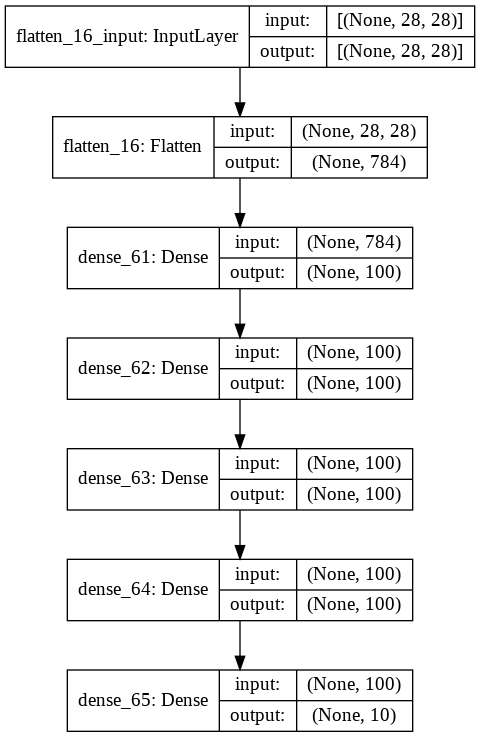

In [ ]:
plot_model(Modelo_4,show_shapes=True)

###**Visualizamos el parámetro 'accuracy':**

In [ ]:
accuracy(Modelo_4)

,Modelo,accuracy
0,Modelo,88.70%


#COMPARACIONES ENTRE LOS RESULTADOS DE LOS MODELOS DE ENTRENAMIENTO

**Vamos a proceder a ilustrar mediante una tabla los diferentes resultados de 'accuracy' en los modelos de entrenamiento:**

In [ ]:
Resultados = [["Modelo_1", accuracy_value(Modelo_1)],
              ["Modelo_2", accuracy_value(Modelo_2)],
              ["Modelo_3", accuracy_value(Modelo_3)],
              ["Modelo_4", accuracy_value(Modelo_4)]]

Comparativa = pd.DataFrame(Resultados, columns=["Modelos", "Accuracy"])
Comparativa

,Modelos,Accuracy
0,Modelo_1,88.91%
1,Modelo_2,88.73%
2,Modelo_3,88.89%
3,Modelo_4,88.70%


**Como podemos observar, los resultados son muy similares.**

**Aun así, seguimos teniendo que decidirnos ante un modelo concreto y en nuestro caso ese modelo será:**

 * **Modelo_1**

#ANÁLISIS Y PREDICCIONES DE NUESTRO MODELO ESCOGIDO (Modelo_1)

**Para saber si nuestro modelo realiza un buen análisis de las predicciones, podriamos crear una función que nos muestre cuantas imágenes deseemos en las cuales nos indique si estamos acertados o no:**

In [ ]:
def Imagen_aleatoria_prediccion(model,images,truelabels,classes,x,figsize):
      plt.figure(figsize=figsize)
      for a in range(x):
        ax=plt.subplot(x,x,a+1)
        i=random.choice(range(len(images)))
      #create predicitions
        target_image=images[i]
        pred_probs=model.predict(target_image.reshape(1,28,28))#because we only want 1 image and our images are 28 x 28)
        pred_label= classes[pred_probs.argmax()]
        true_label = classes[truelabels[i]]
        plt.imshow(target_image, cmap=plt.cm.binary)


      #color for correct predict or not
        if pred_label== true_label:
          color="green"
        else:
          color="red"
        #add xlabel info for the predictions
        plt.xlabel("Predicción: {} at {:2.0f}% (Verdad: {})".format(pred_label,
                                                          100*tf.reduce_max(pred_probs),
                                                          true_label), 
                  color=color)

##**Visualización de 4 predicciones en nuestro modelo:**

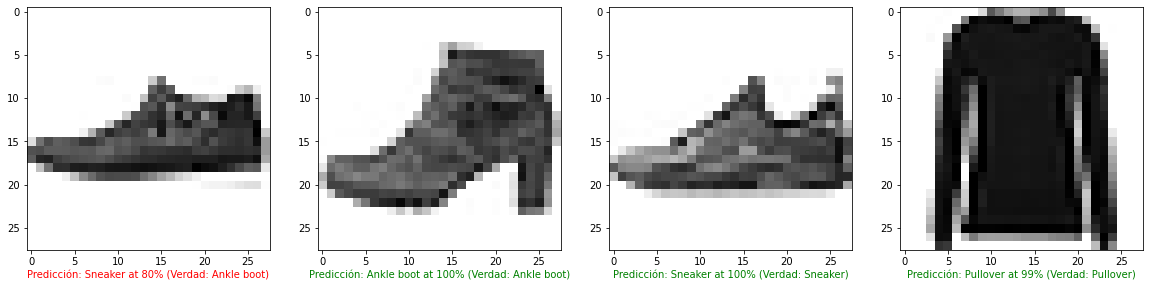

In [ ]:
Imagen_aleatoria_prediccion(Modelo_1, xtest_normalizado, ytest, clases, 4, (20,80))

**Tras visualizar varias imágenes se puede observar que en ciertas clases comete errores, sobretodo en las que las clases son bastante similiares**

**Para poder profundizar más adentro de las predicciones y que patrones confunde, vamos a crear una 'Confusion matrix'.**

###**Creación de la matriz de confusión:**

**Vamos a definir la función que nos permita visualizar la matriz en cuestión**

In [ ]:
# Primero debemos definir la variable de predicción:
yprob = Modelo_1.predict(xtest_normalizado)
ypred = yprob.argmax(axis=1)

In [ ]:
# Creamos la función:

def Matriz_confusion(ytest, ypred, classes, figsize, textsize):
  yprob=Modelo_1.predict(xtest_normalizado)
  ypred=yprob.argmax(axis=1)
  cm=confusion_matrix(ytest,ypred)
  cmn=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
  n_classes=cm.shape[0]
  fig,ax=plt.subplots(figsize=figsize)
  cax=ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)
  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])
  ax.set(title="MATRIZ DE CONFUSIÓN",
         xlabel="PREDICCIÓN",
         ylabel="REALIDAD",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)
  ax.yaxis.label.set_size(textsize)
  ax.xaxis.label.set_size(textsize)
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()
  ax.title.set_size(textsize)

  th=(cm.max()+cm.min())/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i, f"{cm[i,j]} ({cmn[i,j]*100:0.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i,j] > th else "black",
             size=textsize)

####**Visualizacion de la matriz de confusión:**

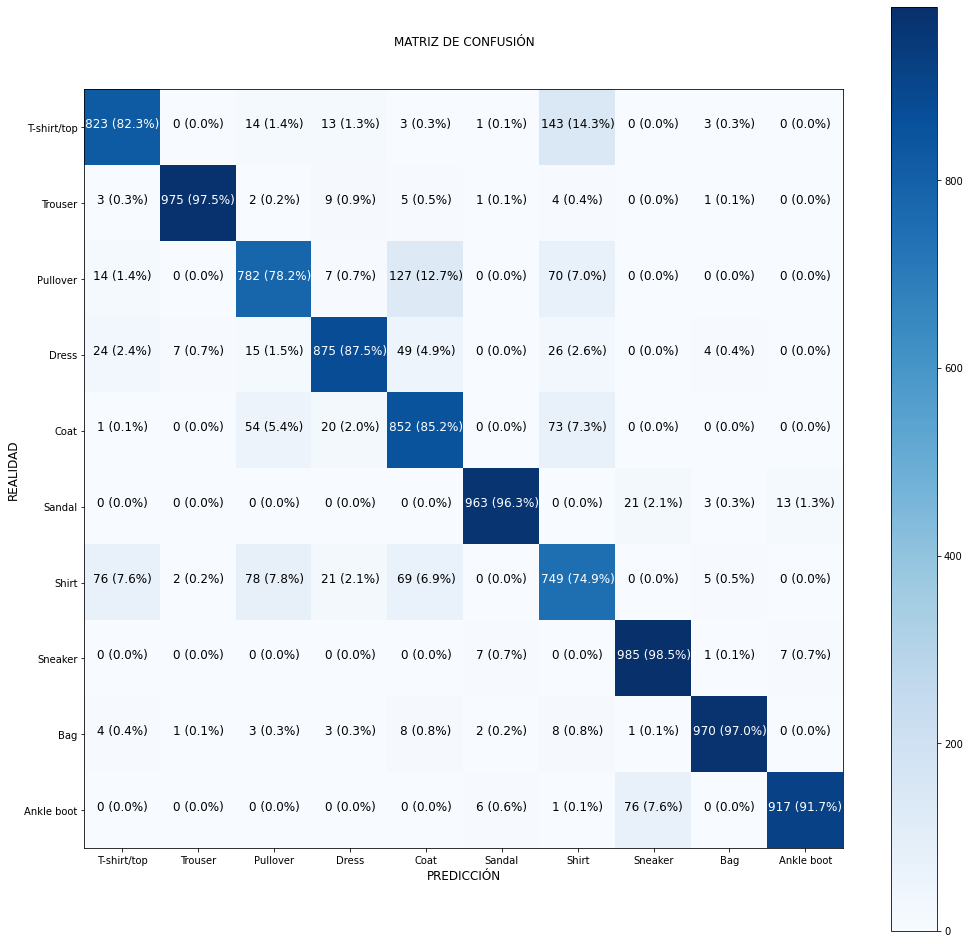

In [ ]:
Matriz_confusion(ytest, ypred, clases, (17,17), 12)

**Las clases que confunde más nuestro modelo son las que se asemejan más entre sí.**

**En el apartado de abajo, el último, opino como se podría llegar a mejorar más el modelo**

#CONCLUSIONES

**El modelo se podría llegar a mejor más dedicándole más tiempo a la experimentación del mismo, pero, creo que en el error está en las imágenes como tal.**

**El modelo confunde clases que se asemejan entre sí, por tanto creo que unas buenas soluciones serían:**

 * ***Aumentar el numero de muestras que se asemejan.***
 * ***Realizar más experimentaciones con nuestro modelo.***

